# Data Science and Business Analytics Internship @THE SPARKS FOUNDATION: GRIP August 2021

## Task 3: Exploratory data analysis on SampleSuperstore data

### BY: ANABELI CHANDRA, St. Xavier's College (Autonomous), Kolkata

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing the dataset and checking out the data

In [4]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
#checking for any potential null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
df.columns #checking the features the data comes with

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
df.duplicated().sum()

17

There are 17 duplicate rows of data in our dataset and we therefore simply drop those rows so as to avoid skewed results in our exploratory data analysis

In [11]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [12]:
df=df.drop(['Postal Code'],axis=1) #dropping columns which do not play a significant role in  data analysis

In [13]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Exploratory Data Analysis 

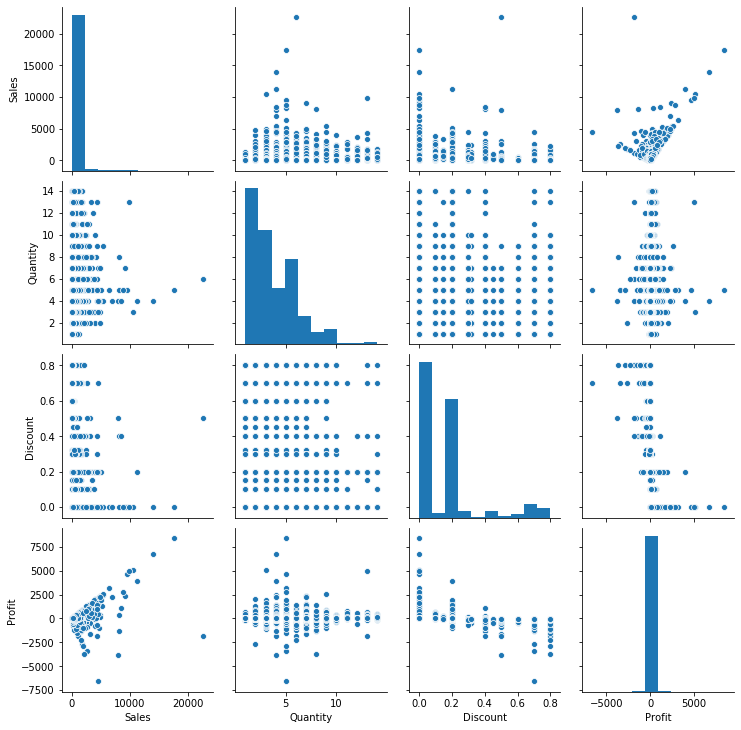

In [14]:
sns.pairplot(df)

<Figure size 720x432 with 0 Axes>

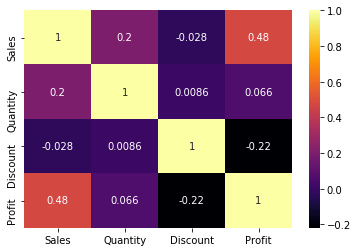

<Figure size 720x432 with 0 Axes>

In [15]:
df.corr()
sns.heatmap(df.corr(),annot=True,cmap='inferno')
plt.figure(figsize=(10,6))

### Sales Analysis using Category and Sub-Category

<Figure size 720x720 with 0 Axes>

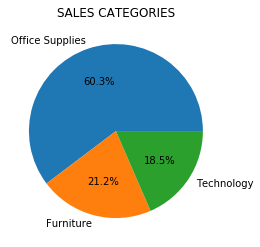

<Figure size 720x720 with 0 Axes>

In [16]:
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%')
plt.title('SALES CATEGORIES')
plt.figure(figsize=(10,10))

C:\Users\ANABELI\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


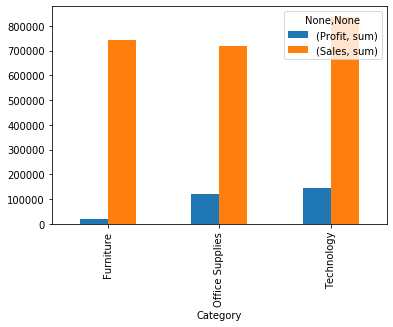

In [18]:
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()

We observe that the sale of goods from 'Technology' category has given us the most profits and the last profits have been made from selling 'Furniture'

Text(0, 0.5, 'Total sales (blue) and Profit (green)')

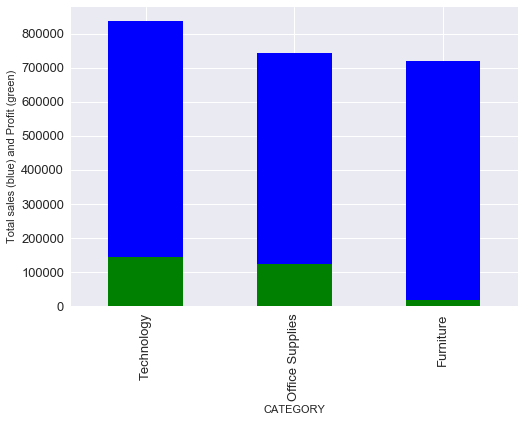

In [44]:
#computing top categories in terms of SALES from first 100 observations
top_sales=df.groupby("Category").Sales.sum().nlargest(n=100)
#computing top categories in terms of SALES from first 100 observations
top_profit=df.groupby("Category").Profit.sum().nlargest(n=100)

#plotting the data obtained above
top_sales.plot(kind='bar',fontsize='13',color='blue')
top_profit.plot(kind='bar',fontsize='13',color='green')
plt.xlabel('CATEGORY')
plt.ylabel('Total sales (blue) and Profit (green)')

Text(0, 0.5, 'Total sales/profit')

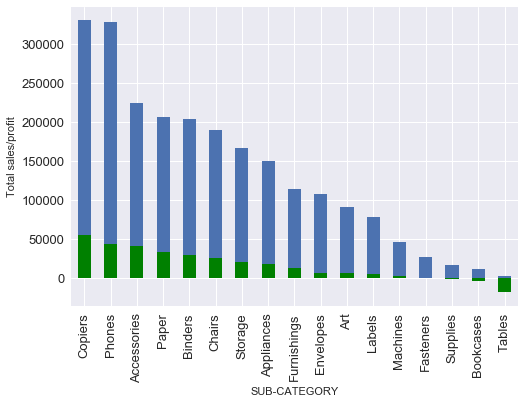

In [45]:
#computing top sub-categories in terms of sales from first 200 datapoints 
top_sc_sales=df.groupby("Sub-Category").Sales.sum().nlargest(n=200)
#computing top sub-categories in terms of profit from first 200 datapoints 
top_sc_profit=df.groupby("Sub-Category").Profit.sum().nlargest(n=200)

#plotting graphically the data obtained above
top_sc_sales.plot(kind='bar',fontsize='13')
top_sc_profit.plot(kind='bar',fontsize='13',color='green')
plt.xlabel('SUB-CATEGORY')
plt.ylabel('Total sales/profit')

It is clear from the above plot that the most sales and was made of Copiers and the Tables were hardly sold and resulted in a loss (green area below the x-axis)

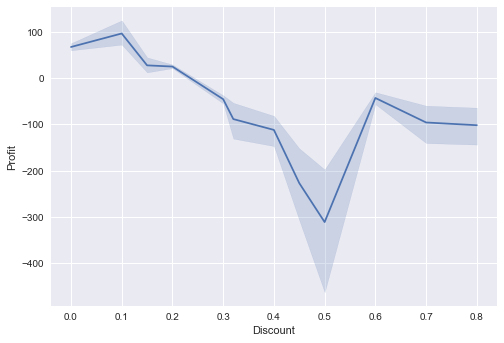

In [35]:
sns.lineplot(df['Discount'],df['Profit'],data=df)

We observe that the profits made decreased sharply as the discount percentage was increased from 10% to 50%. So the optimal discount percentage for increasing sales and maximizing profits would be 10%.

### Visualising SALES vs PROFITS in various regions

([<matplotlib.patches.Wedge at 0x26b15f6bec8>,
 [Text(0.587972350722521, 0.9296711863803422, 'West'),
  Text(-1.0703729729254798, 0.2535777964070795, 'East'),
  Text(-0.1946821397722153, -1.0826351483550272, 'Central'),
  Text(0.960424836742563, -0.5362687133965782, 'South')],
 [Text(0.32071219130319323, 0.5070933743892775, '32.0%'),
  Text(-0.5838398034138981, 0.1383151616765888, '28.5%'),
  Text(-0.10619025805757197, -0.5905282627391056, '23.2%'),
  Text(0.5238680927686706, -0.2925102073072245, '16.2%')])

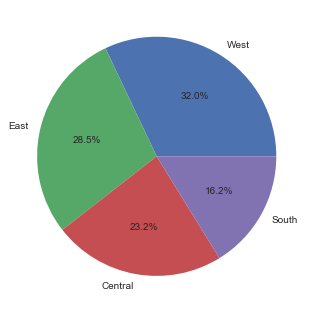

In [38]:
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index,autopct='%1.1f%%')

The graph shows that West and East have the same profit, though sales in the East are less compared the that in the West.

### Visualising Sales vs Profits in different states

Text(0, 0.5, 'Total sales/profit')

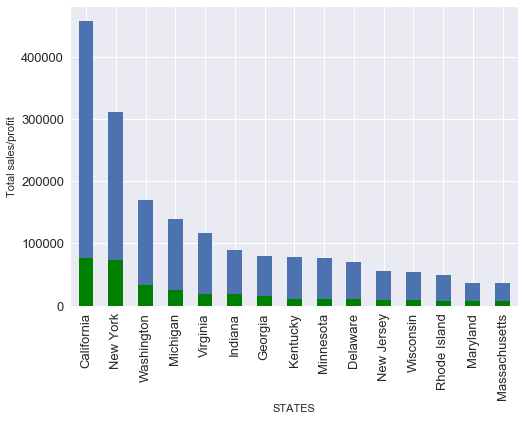

In [46]:
#computing top states in terms of sales from first 15 datapoints 
top_sales_st=df.groupby("State").Sales.sum().nlargest(n=15)
#computing top states in terms of profit from first 15 datapoints 
top_prof_st=df.groupby("State").Profit.sum().nlargest(n=15)

#plotting graphically the data obtained above
top_sales_st.plot(kind='bar',fontsize='13')
top_prof_st.plot(kind='bar',fontsize='13',color='green')
plt.xlabel('STATES')
plt.ylabel('Total sales/profit')

### Data-driven conclusions:

The following can be adapted in order to increase profits:
1. Sales of technological and goods and office supplies should be maximised and furniture sales should be limited
2.Particularly, sales of tables should be minimised and more copiers should be stocked for sale
3. The stakeholders should focus more on sales in the sates of New York and California as these provide maximum profits
4. Stakeholders should also focus on improving sales in the other sates, especially like Maryland and Massachusetts by exploring the demands of the local customer base
5. Profit in the east is the highest and hence sales should be increased therein